<a href="https://colab.research.google.com/github/marquinamaria/UCB_MDSv4_ML/blob/main/ARL_FP_Growth_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Publicacion que propuso el Algoritmo

- http://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining.-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf

- https://research.google.com/pubs/archive/34668.pdf

- A Guided FP-growth algorithm for multitude-targeted mining of big data. arXiv:1803.06632 [cs.DB]. https://doi.org/10.48550/arXiv.1803.06632



# Breve Explicacion de como funciona

El algoritmo FP-growth (Frequent Pattern growth) es una técnica eficiente y escalable de minería de datos que permite el descubrimiento patrones frecuentes en conjuntos de datos transaccionales o de cestas de la compra sin generar conjuntos de elementos candidatos. Fue propuesto por Jiawei Han y Jian Pei en 2000 como una mejora del algoritmo Apriori, que es otra técnica comúnmente utilizada para la minería de patrones frecuentes.

Los siguientes son los pasos para el algoritmo de crecimiento de FP

1. Escanear la base de datos una vez para encontrar un conjunto frecuente de 1 elemento **1-itemset** (patrón de elemento único)
2. Ordenar los elementos frecuentes en orden descendente de frecuencia, **f-list**
3. Escanear la base de datos nuevamente, y construir el árbol FP, **FP-tree**
4. Construir el árbol FP condicional en la secuencia de orden inverso de **f-list** y luego generar un conjunto de elementos frecuentes


# Tipos de Entrada

Algunos de los tipos de datos de entrada típicos para FP-Growth son los siguientes:

1. **Conjunto de datos transaccionales**: FP-Growth se utiliza comúnmente para analizar conjuntos de datos que contienen registros de transacciones. Cada transacción es una lista de elementos o artículos. Los elementos pueden representar productos comprados por un cliente, palabras en documentos, elementos de interacción en un sitio web o cualquier otro tipo de transacción donde se registren elementos que ocurren juntos.

2. **Conjunto de datos de cestas de la compra**: FP-Growth también se utiliza en análisis de cestas de la compra en tiendas minoristas. En este caso, cada transacción representa una cesta de la compra de un cliente, y los elementos son los productos comprados.

3. **Conjunto de datos de interacciones en línea**: En análisis de registros de usuarios en un sitio web o aplicación, las transacciones pueden representar las acciones realizadas por un usuario, como hacer clic en enlaces o ver páginas. Los elementos pueden representar páginas web, categorías de productos, palabras clave de búsqueda, etc.

# Casos de Uso

Aquí detallamos algunos casos de uso comunes de FP-Growth:

1. **Análisis de cestas de la compra en comercio minorista**: FP-Growth se usa para identificar patrones de compra frecuentes en los registros de ventas de una tienda minorista. Esto puede ayudar a la tienda a tomar decisiones sobre cómo organizar sus productos en las estanterías, cómo hacer recomendaciones a los clientes o cómo planificar promociones basadas en los productos que se compran juntos con frecuencia.

2. **Recomendación de productos**: En sitios de comercio electrónico y aplicaciones de recomendación, FP-Growth se puede utilizar para analizar el historial de compras de los usuarios y sugerir productos relacionados en función de patrones frecuentes. Esto mejora la experiencia del usuario y puede aumentar las ventas cruzadas.

3. **Detección de fraudes en tarjetas de crédito**: FP-Growth se utiliza para analizar patrones de uso de tarjetas de crédito y detectar actividades fraudulentas. Por ejemplo, si ciertos patrones de gastos o compras inusuales se detectan con frecuencia en las transacciones de tarjetas de crédito, el algoritmo podría alertar sobre posibles fraudes.

4. **Análisis de clics en publicidad en línea**: En la publicidad en línea, FP-Growth puede utilizarse para analizar patrones de clics en anuncios y determinar qué anuncios o categorías de anuncios suelen atraer a los usuarios juntos. Esto puede ayudar a las empresas a optimizar sus estrategias publicitarias.

5. **Análisis de registros de usuarios en sitios web y aplicaciones**: FP-Growth se utiliza para analizar los registros de actividad de los usuarios en sitios web y aplicaciones para identificar patrones de interacción comunes. Esto puede ayudar a mejorar la usabilidad del sitio web, personalizar la experiencia del usuario y aumentar la retención de usuarios.

6. **Detección de enfermedades en registros médicos**: En la atención médica, FP-Growth se utiliza para analizar registros médicos y encontrar patrones de síntomas o diagnósticos que ocurren juntos con frecuencia. Esto puede ayudar en la detección temprana de enfermedades o en la identificación de factores de riesgo.

7. **Segmentación de clientes**: FP-Growth se utiliza en la segmentación de clientes para identificar grupos de clientes con comportamientos de compra similares. Esto permite a las empresas adaptar sus estrategias de marketing y servicios a grupos específicos de clientes.

8. **Análisis de texto**: FP-Growth también se puede aplicar a la minería de texto para descubrir patrones de palabras o términos que aparecen juntos con frecuencia en documentos. Esto es útil en la clasificación de documentos, resumen de texto y análisis de sentimientos.

# Source Code

In [142]:
!chmod 600 /root/.kaggle/kaggle.json

In [143]:
!kaggle datasets download -d heeraldedhia/groceries-dataset

groceries-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [144]:
!unzip -o groceries-dataset.zip

Archive:  groceries-dataset.zip
  inflating: Groceries_dataset.csv   


In [145]:
import pandas as pd

In [146]:
# Carga los datos desde el archivo CSV
data = pd.read_csv('Groceries_dataset.csv')

In [147]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [148]:
data.shape

(38765, 3)

In [149]:
data.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

**Revisamos missing values**

In [150]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

**Obtenemos la lista de items para cada `Member_number` y `Date`**

In [151]:
grouped_data = data.groupby(["Member_number", "Date"])["itemDescription"].apply(list)
transactions_df = grouped_data.reset_index()
transactions_df.head()

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


In [152]:
transactions_df.shape

(14963, 3)

**Transformamos el dataset**

In [153]:
from mlxtend.preprocessing import TransactionEncoder

In [154]:
te = TransactionEncoder()
te_ary = te.fit(transactions_df['itemDescription']).transform(transactions_df['itemDescription'])
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


**Ejecutamos FP-growth**

In [155]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)

In [156]:
frequent_itemsets.sort_values('support', ascending = False)
frequent_itemsets.head()

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.051728,(pastry)
4,0.018780,(salty snack)


**Graficamos patrones frecuentes**

In [157]:
import networkx as nx
import matplotlib.pyplot as plt

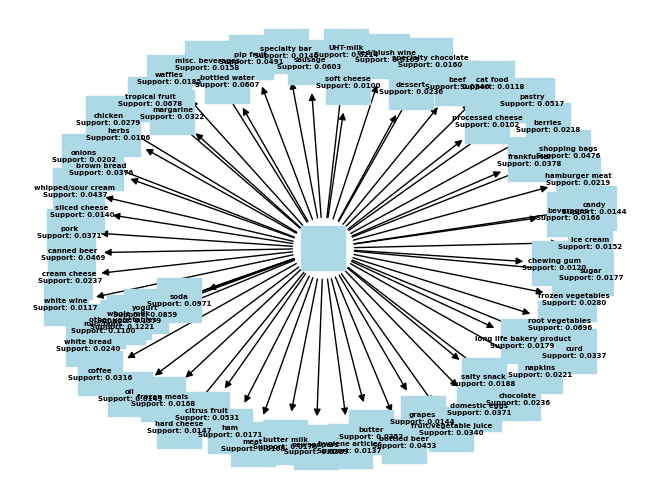

In [158]:
# Create a directed graph
G = nx.DiGraph()

# Add root node
G.add_node("Root")

# Add frequent itemsets to the graph
for _, row in frequent_itemsets.iterrows():
    support = row['support']
    itemset = row['itemsets']

    parent = "Root"
    for item in itemset:
        if not G.has_node(item):
            G.add_node(item, label=f"{item}\nSupport: {support:.4f}")
        G.add_edge(parent, item)
        parent = item

# Plot the tree-like structure
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')
#nx.draw(G, pos, labels=labels, with_labels=True, font_weight='bold', node_size=3000, node_color='lightblue')
nx.draw(G, pos, node_shape = "s", labels=labels, with_labels=True, node_size=1000, node_color='lightblue', font_size=5, font_color='black', font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'support')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

**Examinamos el conjunto de items frecuentes**

In [159]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head()

,support,itemsets,length
0,0.157923,(whole milk),1
1,0.085879,(yogurt),1
2,0.060349,(sausage),1
3,0.051728,(pastry),1
4,0.018780,(salty snack),1


Si imprimimos `value_counts()` para la columna `length`, veremos que obtenemos una cantidad de conjuntos de elementos que contienen varios elementos y que contienen elementos individuales.

In [160]:
frequent_itemsets['length'].value_counts()

1    64
2     5
Name: length, dtype: int64

**Calculo de reglas de asociacion**

In [161]:
from mlxtend.frequent_patterns import association_rules

In [162]:
# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
6,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
7,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
8,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
9,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461


Tenos 9 reglas descubiertas

La regla `(other vegetables) --> (whole milk)` tiene un valor de confidence del 12.15%, y su lift es de 0.76.


**Crear un grafo con las reglas de asociacion descubiertas**

In [163]:
import networkx as nx

In [164]:
G_rules = nx.from_pandas_edgelist(rules, source="antecedents", target="consequents", edge_attr="support")

**Graficar**

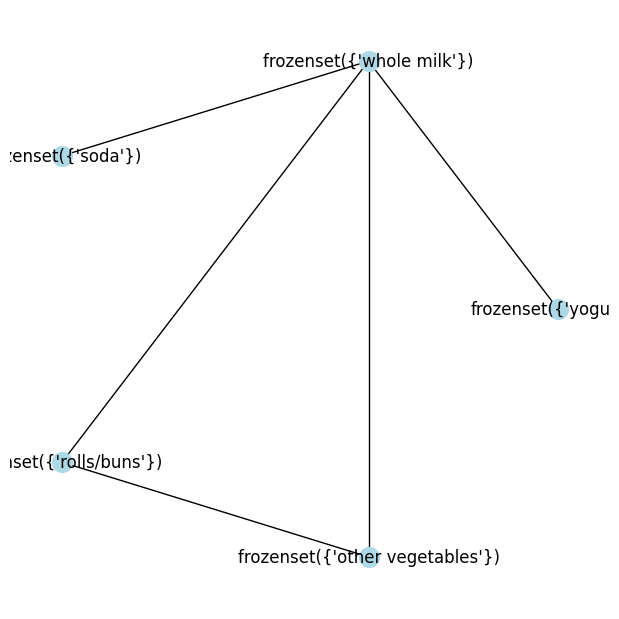

In [165]:
plt.figure(figsize=(6, 6))
width = rules['lift'].values/10
nx.draw_circular(G_rules, node_color="lightblue", edge_color="black", with_labels=True, node_size=200)
plt.show()